In [3]:
import zipfile
import os

zip_path = "./Satellite Image Classification.zip"        
extract_to = "./Satellite Image Classification"   

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


In [6]:
!pip install tensorflow

In [7]:
!pip install matplotlib

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image

In [2]:
data_dir = './Satellite Image Classification/data'

Parameters

In [3]:
img_height = 128
img_width = 128
batch_size = 32

Data Preprocessing

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


Visualization

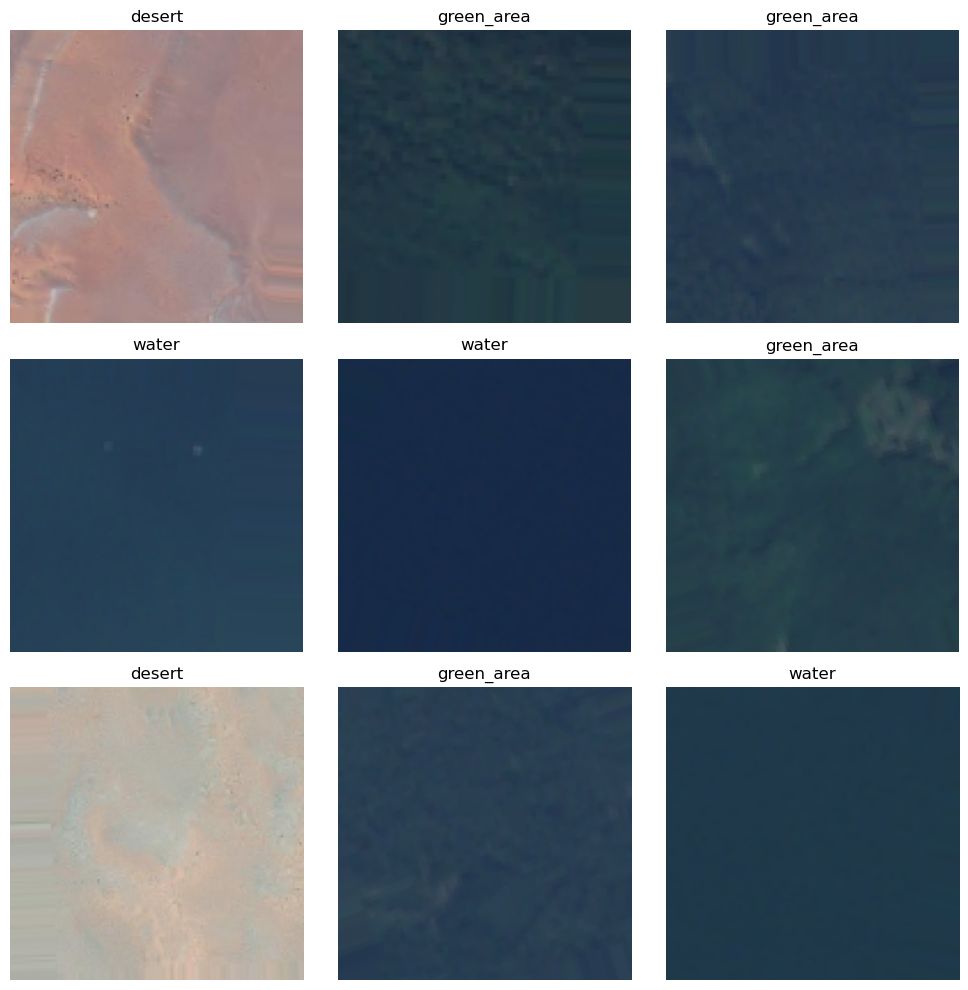

In [6]:
class_names = list(train_data.class_indices.keys())

images, labels = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

Model - 1 

Building Model

In [7]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected (Dense) Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(len(train_data.class_indices), activation='softmax'))  # 'len(train_generator.class_indices)' gives the number of classes

E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

Compiling Model

In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Training Model

In [10]:
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

E:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 539ms/step - accuracy: 0.5862 - loss: 0.7810 - val_accuracy: 0.7913 - val_loss: 0.4115
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 499ms/step - accuracy: 0.8204 - loss: 0.4351 - val_accuracy: 0.8623 - val_loss: 0.3643
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 73s 518ms/step - accuracy: 0.8447 - loss: 0.3913 - val_accuracy: 0.8215 - val_loss: 0.3826
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 72s 513ms/step - accuracy: 0.8520 - loss: 0.3672 - val_accuracy: 0.8739 - val_loss: 0.2861
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 564ms/step - accuracy: 0.8629 - loss: 0.3166 - val_accuracy: 0.8606 - val_loss: 0.3419
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 72s 509ms/step - accuracy: 0.8758 - loss: 0.3222 - val_accuracy: 0.7540 - val_loss: 0.4121
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 559ms/step - accuracy: 0.8624 - loss: 0.3359 - val_accuracy: 0.8623 - val_loss: 0.2792
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 77s 545ms/step - accuracy: 0.8879 - loss: 0

Evaluation Metrics

Evaluate on validation data

In [11]:
val_loss, val_acc = model.evaluate(val_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.9310 - loss: 0.1568
Validation Loss: 0.18043991923332214
Validation Accuracy: 0.9262877702713013


Evaluate the model on the test data after training

In [12]:
y_true = val_data.classes  # True labels from validation set
y_pred = model.predict(val_data)  # Model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
report = classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys())
print("Classification Report:")
print(report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 447ms/step
Accuracy: 92.63%
Classification Report:
              precision    recall  f1-score   support

      cloudy       0.98      0.93      0.95       300
      desert       0.92      1.00      0.96       226
  green_area       0.91      0.90      0.90       300
       water       0.90      0.90      0.90       300

    accuracy                           0.93      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.93      0.93      0.93      1126

Confusion Matrix:
[[278  20   2   0]
 [  0 226   0   0]
 [  0   0 270  30]
 [  5   0  26 269]]


Single Prediction

In [13]:
img_path = './Satellite Image Classification/data/cloudy/train_10043.jpg'  
img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Get class labels 
class_labels = list(train_data.class_indices.keys())
print("Predicted class:", class_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicted class: cloudy


Model - 2

Building Model

In [14]:
model_2 = Sequential()

# 1st Convolutional Layer
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolutional Layer 
model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# 5th Convolutional Layer 
model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# 6th Convolutional Layer 
model_2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D
model_2.add(Flatten())

# Fully connected (Dense) Layer
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))  

# Output Layer
model_2.add(Dense(len(train_data.class_indices), activation='softmax')) 

E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,191,172 (15.99 MB)

 Trainable params: 4,191,172 (15.99 MB)

 Non-trainable params: 0 (0.00 B)

Compiling Model

In [16]:
model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Training Model

In [17]:
history_2 = model_2.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 767ms/step - accuracy: 0.4523 - loss: 0.9852 - val_accuracy: 0.5195 - val_loss: 0.7161
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 106s 748ms/step - accuracy: 0.5482 - loss: 0.7476 - val_accuracy: 0.6670 - val_loss: 0.5643
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 107s 757ms/step - accuracy: 0.6375 - loss: 0.6604 - val_accuracy: 0.6687 - val_loss: 0.5197
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 104s 735ms/step - accuracy: 0.6764 - loss: 0.5377 - val_accuracy: 0.6785 - val_loss: 0.5246
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 106s 747ms/step - accuracy: 0.7037 - loss: 0.5052 - val_accuracy: 0.7282 - val_loss: 0.4730
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 104s 738ms/step - accuracy: 0.7097 - loss: 0.4923 - val_accuracy: 0.6545 - val_loss: 0.7170
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 104s 738ms/step - accuracy: 0.7041 - loss: 0.5620 - val_accuracy: 0.7433 - val_loss: 0.4556
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 105s 743ms/step - accuracy: 0.7346 -

Evaluation Metrics

Evaluate on validation data

In [18]:
val_loss, val_acc = model_2.evaluate(val_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 499ms/step - accuracy: 0.9046 - loss: 0.2079
Validation Loss: 0.2816188633441925
Validation Accuracy: 0.873001754283905


Evaluate the model on the test data after training

In [19]:
y_true = val_data.classes  # True labels from validation set
y_pred = model_2.predict(val_data)  # Model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
report = classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys())
print("Classification Report:")
print(report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step
Accuracy: 86.86%
Classification Report:
              precision    recall  f1-score   support

      cloudy       0.85      0.96      0.90       300
      desert       0.94      0.79      0.86       226
  green_area       0.82      0.92      0.86       300
       water       0.91      0.79      0.84       300

    accuracy                           0.87      1126
   macro avg       0.88      0.86      0.87      1126
weighted avg       0.87      0.87      0.87      1126

Confusion Matrix:
[[288  12   0   0]
 [ 47 179   0   0]
 [  1   0 275  24]
 [  2   0  62 236]]


Single Prediction

In [61]:
img_path = './Satellite Image Classification/data/cloudy/train_10043.jpg'  
img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

# Predict
prediction = model_2.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Get class labels 
class_labels = list(train_data.class_indices.keys())
print("Predicted class:", class_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted class: cloudy


Model - 3

Building Model

In [20]:
model_3 = Sequential()

# 1st Conv Block
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Block
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Block
model_3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

# 4th Conv Block
model_3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# 5th Conv Block
model_3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

# Flatten and Dense layers
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(len(train_data.class_indices), activation='softmax'))

E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,670,980 (14.00 MB)

 Trainable params: 3,668,996 (14.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

Compiling Model

In [22]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training Model

In [23]:
history_3 = model_3.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 146s 957ms/step - accuracy: 0.7279 - loss: 2.2465 - val_accuracy: 0.2664 - val_loss: 7.2970
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 123s 866ms/step - accuracy: 0.8155 - loss: 0.6146 - val_accuracy: 0.2931 - val_loss: 10.5636
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 121s 852ms/step - accuracy: 0.8537 - loss: 0.4092 - val_accuracy: 0.5657 - val_loss: 5.9044
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 121s 859ms/step - accuracy: 0.8621 - loss: 0.3735 - val_accuracy: 0.7895 - val_loss: 0.7786
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 122s 861ms/step - accuracy: 0.8679 - loss: 0.3839 - val_accuracy: 0.7282 - val_loss: 1.1068
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 122s 862ms/step - accuracy: 0.8534 - loss: 0.3794 - val_accuracy: 0.8597 - val_loss: 0.3548
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 531s 4s/step - accuracy: 0.8745 - loss: 0.3411 - val_accuracy: 0.7220 - val_loss: 0.8510
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 122s 866ms/step - accuracy: 0.8716 - l

In [31]:
history_3_a = model_3.fit(
    train_data,
    epochs=40,
    validation_data=val_data
)

Epoch 1/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9558 - loss: 0.1676 - val_accuracy: 0.5311 - val_loss: 3.5410
Epoch 2/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9502 - loss: 0.2275 - val_accuracy: 0.8739 - val_loss: 0.5444
Epoch 3/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 137s 968ms/step - accuracy: 0.9655 - loss: 0.1137 - val_accuracy: 0.8250 - val_loss: 1.8566
Epoch 4/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 138s 977ms/step - accuracy: 0.9578 - loss: 0.1556 - val_accuracy: 0.8845 - val_loss: 0.3346
Epoch 5/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 140s 989ms/step - accuracy: 0.9596 - loss: 0.1301 - val_accuracy: 0.8819 - val_loss: 0.8730
Epoch 6/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 134s 951ms/step - accuracy: 0.9495 - loss: 0.1731 - val_accuracy: 0.9769 - val_loss: 0.0748
Epoch 7/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 134s 947ms/step - accuracy: 0.9604 - loss: 0.1136 - val_accuracy: 0.9432 - val_loss: 0.1518
Epoch 8/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 137s 969ms/step - accuracy: 0.9697 - loss:

Evaluation Metrics

Evaluate on validation data

In [25]:
val_loss, val_acc = model_3.evaluate(val_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 387ms/step - accuracy: 0.8442 - loss: 0.9671
Validation Loss: 0.9725784063339233
Validation Accuracy: 0.8330373167991638


In [32]:
val_acc_3_a=history_3_a.history['val_accuracy'][-1]
val_loss_3_a=history_3_a.history['val_loss'][-1]
print(f"Final Validation Accuracy:\nModel 3_a: {val_acc_3_a:.4f}")
print(f"Final Validation Loss:\nModel 3_a: {val_loss_3_a:.4f}")

Final Validation Accuracy:
Model 3_a: 0.9938
Final Validation Loss:
Model 3_a: 0.0230


Evaluate the model on the test data after training

In [26]:
y_true = val_data.classes  # True labels from validation set
y_pred = model_3.predict(val_data)  # Model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
report = classification_report(y_true, y_pred_classes, target_names=val_data.class_indices.keys())
print("Classification Report:")
print(report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 369ms/step
Accuracy: 83.04%
Classification Report:
              precision    recall  f1-score   support

      cloudy       0.62      0.99      0.77       300
      desert       1.00      0.28      0.44       226
  green_area       0.97      1.00      0.98       300
       water       0.99      0.91      0.95       300

    accuracy                           0.83      1126
   macro avg       0.90      0.80      0.79      1126
weighted avg       0.89      0.83      0.81      1126

Confusion Matrix:
[[298   0   0   2]
 [162  64   0   0]
 [  1   0 299   0]
 [ 17   0   9 274]]


In [36]:
# Get true labels from validation set
y_true = val_data.classes

# Predict probabilities using the updated model (model_3)
y_pred = model_3.predict(val_data)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy (Model 3_a): {accuracy * 100:.2f}%")

# Generate and print classification report
target_names = list(val_data.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print("Classification Report (Model 3_a):")
print(report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix (Model 3_a):")
print(conf_matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step
Accuracy (Model 3_a): 99.02%
Classification Report (Model 3_a):
              precision    recall  f1-score   support

      cloudy       1.00      1.00      1.00       300
      desert       1.00      1.00      1.00       226
  green_area       0.98      0.99      0.98       300
       water       0.99      0.98      0.98       300

    accuracy                           0.99      1126
   macro avg       0.99      0.99      0.99      1126
weighted avg       0.99      0.99      0.99      1126

Confusion Matrix (Model 3_a):
[[300   0   0   0]
 [  0 226   0   0]
 [  0   0 296   4]
 [  1   0   6 293]]


Single Prediction

In [27]:
img_path = './Satellite Image Classification/data/cloudy/train_10043.jpg'  
img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

# Predict
prediction = model_3.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Get class labels 
class_labels = list(train_data.class_indices.keys())
print("Predicted class:", class_labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Predicted class: cloudy


Comparison

Accuracy Plot

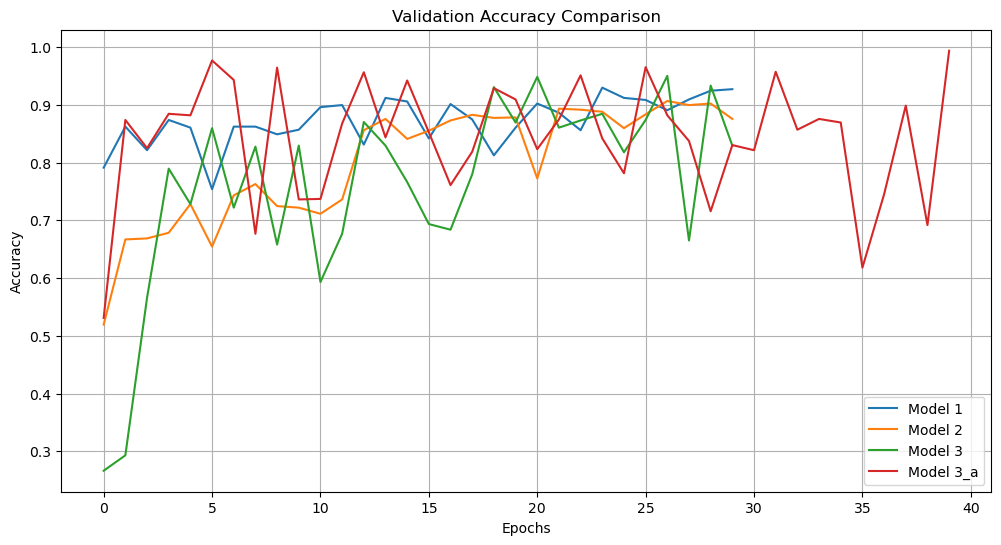

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Model 1')
plt.plot(history_2.history['val_accuracy'], label='Model 2')
plt.plot(history_3.history['val_accuracy'], label='Model 3')
plt.plot(history_3_a.history['val_accuracy'], label='Model 3_a')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Loss Plot

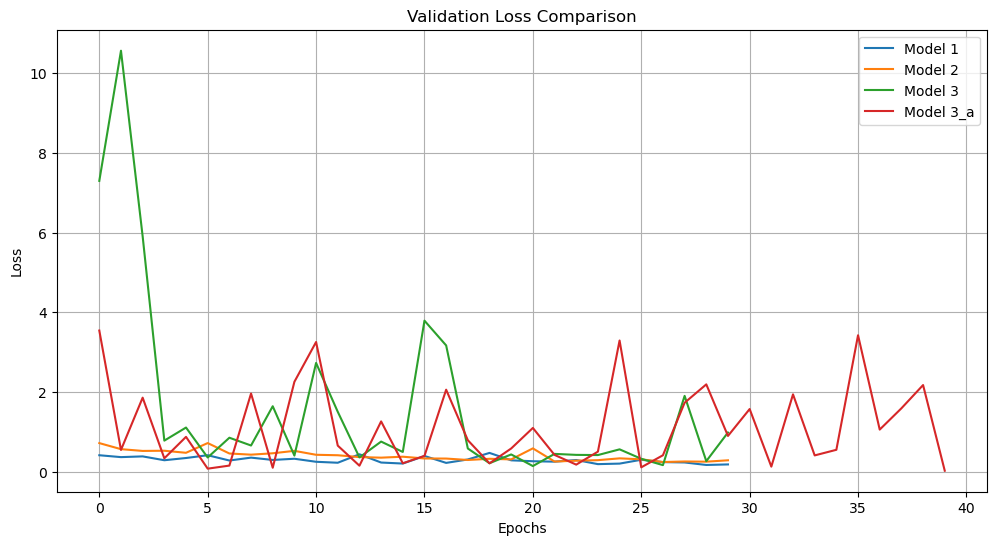

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Model 1')
plt.plot(history_2.history['val_loss'], label='Model 2')
plt.plot(history_3.history['val_loss'], label='Model 3')
plt.plot(history_3_a.history['val_loss'], label='Model 3_a')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
val_acc1 = history.history['val_accuracy'][-1]
val_acc2 = history_2.history['val_accuracy'][-1]
val_acc3 = history_3.history['val_accuracy'][-1]
val_acc3_a=history_3_a.history['val_accuracy'][-1]

print(f"Final Validation Accuracy:\nModel 1: {val_acc1:.4f}\nModel 2: {val_acc2:.4f}\nModel 3: {val_acc3:.4f}\nModel 3_a: {val_acc3_a:.4f}")

Final Validation Accuracy:
Model 1: 0.9272
Model 2: 0.8757
Model 3: 0.8295
Model 3_a: 0.9938
